
# DS 3000 HW 2

Due: Fri Feb 12 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to gradescope.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run "Kernel > Restart & Run All" just before uploading the `ipynb` file to gradescope.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or post a piazza note if you have a specific question about your work you'd like another pair of eyes to talk through.  (Remember, mark your piazza note private if it contains anything which may be considered a solution to the exercise).

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment.  For example, a python trick I find particularly clever (and useful, sometimes):

```python
from collections import defaultdict

def tree(): 
    # https://gist.github.com/hrldcpr/2012250
    return defaultdict(tree)
```

You need not cite the official python documentation or the documentation of any python library which is imported in the template (e.g. matplotlib, numpy, scipy).

**Documentation / style counts for credit**  Please see our course's python style guide, available on canvas, for further information.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Plotting Functions

## Part 1: Plotting Warm Up (17 points)
Plot each of the functions below over 100 evenly spaced points in the domain $[0, 10]$. 

Try different number of points between 0 and 10 and pick a value (probably higher than 11) above which the plot doesn't clearly look nicer - do not include all the attempts, just what you decided worked for you.

Be sure to use the line specifications given below:

| Name       | Value                       | Color | Line Width     | Style  |
|------------|-----------------------------|-------|----------------|--------|
| sinusoid   | 3 * sin (2/3 x)             | Red   | 4              | dotted |
| polynomial | (x-3) (x - 2) (x-8) / 10    | Blue  | 2              | solid  |
| abs value  | min(abs(x - 3), abs(x - 8)) | Green | 3              | dashed |

add a legend which specifies the name of each function.  Use seaborn's `sns.set()` before plotting to make the graph look nice.

Make sure that the axes are labeled `x` and `f(x)`

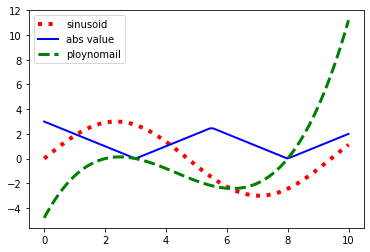

In [2]:
# linespace that create 100 values between 0, to 10
x = np.linspace(0,10,100)


# three functions here
y_1=  3 * np.sin((2/3) * x)

y_2=  ((x-3)* (x - 2)* (x-8)) / 10


y_3= np.min(np.array([abs(x - 3), abs(x - 8)]), axis = 0)



# three plots here that corresponding with each function and their own configuration.
plot1 = plot_sinusoid = plt.plot(x,y_1,linewidth = '4',color = "red",linestyle = 'dotted', label = "sinusoid")


plot_2 = plot_ploynomail = plt.plot(x,y_3,linewidth = '2',color = "blue",linestyle = 'solid', label = 'abs value')


plot_3 = plot_ploynomail = plt.plot(x,y_2,linewidth = '3',color = "green",linestyle = 'dashed', label = 'ploynomail')


#legend
plt.legend()


# Bike Data

## Part 2: DataFrame Analysis Warm Up (7 points)
Recreate the following table of bicycle race data as a dataframe.  Use the `Bike ID` as the index column and save the resulting dataframe as a csv (you need not submit this csv).

| Bike ID | Rider ID | Make      | Color      | Bike Type  | Weight (g) | Time Trial 1 (s) | Time Trial 2 (s) |
|---------|----------|-----------|------------|------------|------------|------------------|------------------|
| 037     | 3        | Bianchi   | Celeste    | Road       | 8200       | 450              | 205              |
| 379     | 1        | Duratec   | \<no paint>| Cyclocross | 9500       | 510              | 222              |
| 398     | 7        | Trek      | Red        | Road       | 9000       | 432              | 211              |
| 37B     | 3        | Trek      | Black      | Mountain   | 13607      | 561              | 301              |
| BRG     | 7        | Canondale | Black      | Mountain   | 15005      | 524              | 299              |
       
    
Note that:
- each time trial records the time taken to complete a given track under similar conditions. 
- some riders (3 and 7) completed the time trials on two distinct bikes, the data is stored in distinct rows

In [3]:
#create a new data frame by typing the dictionary.
biketable = pd.DataFrame({"Bike ID":["037",'379','398','37B','BRG'],"Rider ID" : [3,1,7,3,7], 
                          "Make":['Bianchi','Duratec','Trek','Trek','Canondale'],
                         "Color":["Celeste",'/','Red','Black','Black'],
                          "Bike Type":['Road', 'Cyclocross','Road','Mountain','Mountain'],
                         "Weight":[8200,9500,9000,13607,15005],
                          "Time Trial 1(s)": [450,510,432,561,524],
                          "Time Trial 2(s)":[205,222,211,301,299]})

# set the index, inplace true
biketable.set_index("Bike ID", inplace = True)


biketable

,Rider ID,Make,Color,Bike Type,Weight,Time Trial 1(s),Time Trial 2(s)
Bike ID,,,,,,,
037,3,Bianchi,Celeste,Road,8200,450,205
379,1,Duratec,/,Cyclocross,9500,510,222
398,7,Trek,Red,Road,9000,432,211
37B,3,Trek,Black,Mountain,13607,561,301
BRG,7,Canondale,Black,Mountain,15005,524,299


In [4]:
#save this biketable into a new csv file.
biketable.to_csv("biketable.csv")

## Part 3: Manipulating DataFrames (15 points: 5pt each)

Answer each question below by:
- giving a code cell which constructs a series or dataframe object which easily provides answer to question
- giving a markdwon cell which contains a one sentence response to each question

be mindful that
- your code below produces all the info needed to answer the questions, you shouldn't have to look at the full dataframe to answer your question (real datasets are too big for this to be done easily)
- you create a clean layout of jupyter notebook cells to allow graders to easily follow your work (aesthetics count in Data Science)
- you comment where necessary (including giving meaningful names to intermediate variables)

### Questions:
1. Which `Bike ID` has the greatest weight?
1. Which `Bike ID` has the fastest average time trial?
1. What is the average weight of each bike, per `Bike Type `?  (Hint: get all bikes types via `.unique()`)

In [5]:
#question one , which one is has the biggest weight
a = biketable["Weight"].max()

# get the info that while the items equal to the max number 
b = biketable.loc[biketable["Weight"] == a]

# show the index of select one
print(b.index.values[0])

BRG


In [6]:

# question two
#create a new table and get the average number, saved into a new colunms then return the index.
copytable = biketable.copy()
copytable["average"] = (copytable["Time Trial 1(s)"] + copytable["Time Trial 2(s)"]) /2
copytable.loc[copytable["average"] == copytable['average'].max()].index.values[0]

'37B'

In [7]:
#question three
#groupby and return the average
a = copytable.groupby(['Bike Type']).mean()
a['Weight']

Bike Type
Cyclocross     9500.0
Mountain      14306.0
Road           8600.0
Name: Weight, dtype: float64

# Game Stop Stock
In this exercise we will work with a real-world dataset to look at the activity of the popular (and controversial) GME stock over the last year.

Start by loading the `gme_data_clean.csv` file and displaying its `.head()` to see what columns are available and what the data looks like.

## Part 4: Line Plot (15 points)
Create two plots side-by-side plots using `plt.subplot` of the `gme_data_clean.csv` data.  Both are line plots show the daily high and low prices of the GameStop stock vs time, but:
- The leftward plot has a linear y axis
- The rightward plot has a log scale y axis

Use the `days since 2020_Feb_03` as your x axis in each plot.  Be sure to:
- activate seaborn with `sns.set()` to make the plot look nice
- label each of your axes
- add a legend to distinguish the high and low prices
- give your whole plot an appropriate title (i.e. 'Game Stop Stock' over both subplots)
- resize the plot to be 10 inches wide and 5 inches tall
- print your plot to pdf (don't submit the pdf, we'll check the code)

Using your plot, answer the following question:
- What do you notice about the difference between plots?  When are log scales useful?

In [8]:
from matplotlib.backends.backend_pdf import PdfPages

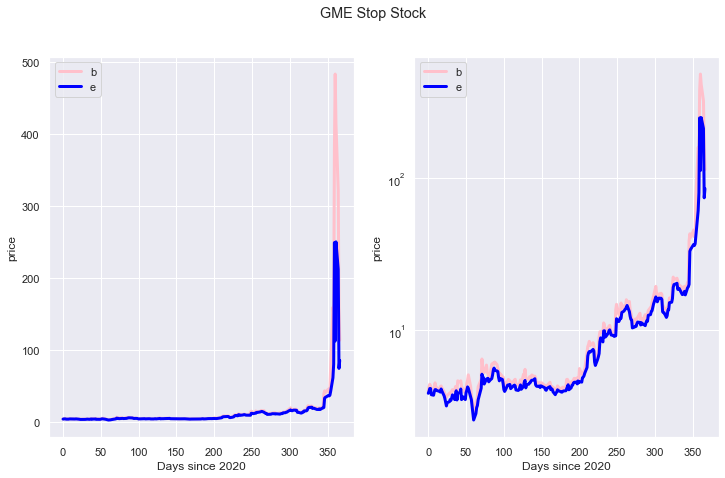

In [9]:
sns.set()
df = pd.read_csv("gme_data_clean.csv")


# the first plot
plt.subplot(121)
plt.plot(df['days since 2020_Feb_03'], df['High'], linewidth=3, color='pink',label = 'high')
plt.plot(df['days since 2020_Feb_03'], df['Low'], linewidth=3, color='blue', label = 'low')
plt.ylabel("price")
plt.xlabel("Days since 2020")
plt.suptitle('GME Stop Stock')
plt.legend('best')


plt.subplot(122)
high = plt.plot(df['days since 2020_Feb_03'], df['High'], linewidth=3, color='pink', label = 'high')
low = plt.plot(df['days since 2020_Feb_03'], df['Low'], linewidth=3, color='blue', label = 'low')


plt.ylabel("price")
plt.xlabel("Days since 2020")
plt.suptitle('GME Stop Stock')
plt.legend('best')
#the second one should use the log-scale to show the difference
plt.yscale('log')
#set the size of the two subplot
plt.gcf().set_size_inches((12,7))


# import this two plots as a pdf
f_out = 'stockPDF.pdf'
with PdfPages(f_out) as pdf:
    pdf.savefig(bbox_inches='tight')

## Answer of this question:
using the log scale, which is the second figure on the right, the figure becomes more detailed and we can see the clearer fluctuation, the stock price going upside down.

# IMDB Movie Data

In this exercise we will look at another real dataset, this time it's a sample of the movies represented in IMDb.

Start by loading the `IMDb_movies_clean.csv` file and displaying its `.head()` to see what columns are available and what the data looks like.

## Part 5: How long are movies in different genres (15 + 2 points)

Create a figure that has three subplots stacked vertically (three rows, one column) where each subplot shows the histogram of `duration` for one of the three `genre`s: `Drama`, `Comedy`, and `Horror`.  Exclude any movies with a multi-genre (e.g. `'Comedy, Horror'`).

* ensure consistent and appropriate `bins` for all subplots
* title each subplot to distinguish genres
* give the entire figure an informative title
* resize the figure as appropriate
* give a consistent y axis to all plots via `ylim()`
* label axes on all subplots
* consider whether `density=True` or `density=False` is a more appropriate input to `plt.hist()` to answer the question below

Answer the following question based exclusively on this data.  Write your answer in a markdown cell below the graph.
1. Which genre of movie typically has longer runtimes?

**Bonus**:  In a seperate figure repeat the exercise above while including multi-genre movies.  For example, a movie with `genre='Comedy, Horror'` should be included in both the `Comedy` and `Horror` categories.

## Answer of the question based on the graph below:
the drama has longer runtimes

In [10]:
tableMoive = pd.read_csv("IMDb_movies_clean.csv")

# assign these  selected target data into three catogories.
comedy = tableMoive.loc[tableMoive['genre'] == 'Comedy']["duration"]
horror = tableMoive.loc[tableMoive['genre'] == 'Horror']["duration"]
drama = tableMoive.loc[tableMoive['genre'] == 'Drama']["duration"]

# put them intot he list and create the name list and color list for later using.
list1 = [comedy, horror,drama]
colorList = ["red","blue","yellow"]
listname = ["comedy",'horror','drama']




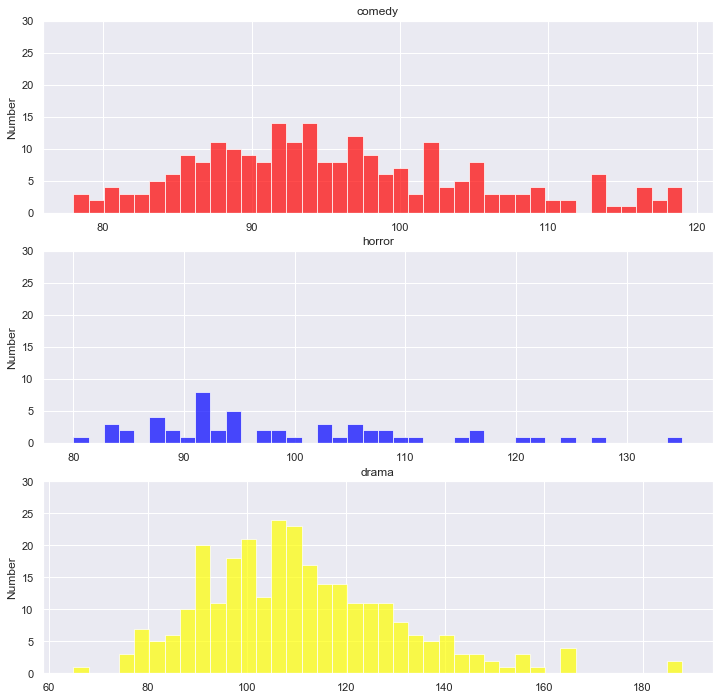

In [11]:
# in the loop, length of three, creating three subplots for each one in the list1(comdey, horror, drama.)
for subplotnumber in range(len(list1)):
    plt.subplot(3,1,subplotnumber + 1)
    plt.hist(list1[subplotnumber], bins = 40, color = colorList[subplotnumber], alpha = 0.7)
 
    plt.title(listname[subplotnumber])
    plt.ylabel("Number")
    plt.ylim(0,30)
    
plt.gcf().set_size_inches((12, 12))

    
   


## The extra credit

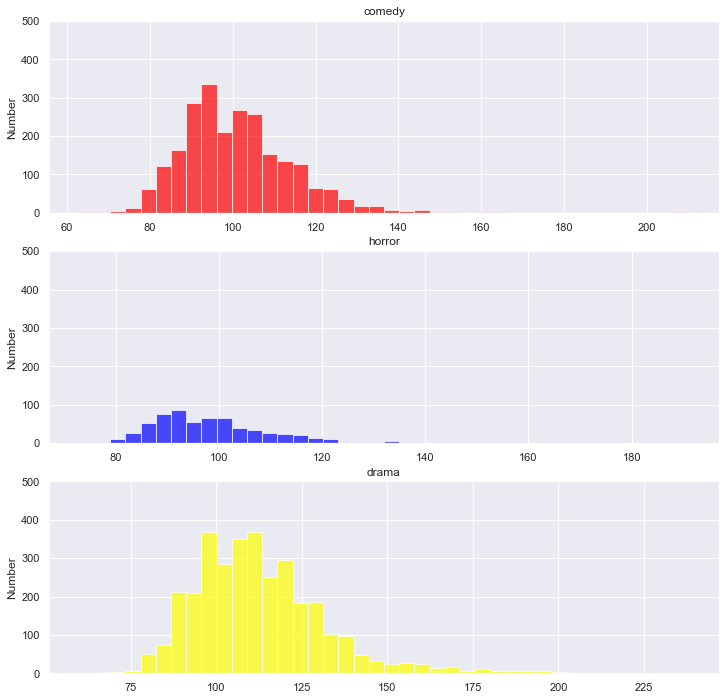

In [12]:
# assign these  selected target data into three catogories.
comedy = tableMoive.loc[tableMoive['genre'].str.contains('Comedy')]["duration"]
horror = tableMoive.loc[tableMoive['genre'].str.contains('Horror')]["duration"]
drama = tableMoive.loc[tableMoive['genre'].str.contains('Drama')]["duration"]

# put them intot he list and create the name list and color list for later using.
list1 = [comedy, horror,drama]
colorList = ["red","blue","yellow"]
listname = ["comedy",'horror','drama']

# in the loop, length of three, creating three subplots for each one in the list1(comdey, horror, drama.)
for subplotnumber in range(len(list1)):
    plt.subplot(3,1,subplotnumber + 1)
    plt.hist(list1[subplotnumber], bins = 40, color = colorList[subplotnumber], alpha = 0.7)
 
    plt.title(listname[subplotnumber])
    plt.ylabel("Number")
    
    # need a new y scale to show the whole data.
    plt.ylim(0,500)
    
plt.gcf().set_size_inches((12, 12))

    


## Part 6: Does budget predict movie ratings? (15 points)
Make a scatter plot of `Budget` and `avg_vote` for movies whose genre is either `Drama` or `Comedy` (only include movies of a single genre ... see explanation above for further detail).  Be sure that your plot:
- plots each genre with a unique color
- adds a legend per genre
- labels axes and gives title to plot
- uses `alpha` to ensure all dots are visible
- use a logarithmic scale where appropriate

Based on the plot, answer the following questions (and explain how you read that form the plot):
1. Does it seem that higher budgets result in better reception by the viewers?
1. Which of the two genres appear to get higher scores from the users?
1. Which of the two genres appear to have higher budgets?

## Answers:
1. Based on the graph below, we can see that the higher budgets result does not lead to a better reception by the viewers. 
2. The Drama has a better performance based on the higher score from the users. 
3. From the scatter plot below, we can see that comparatively, Comedy has a higher budgets.

In [13]:
# the data are selected while in the table, if the genre column only equal to drama, then select the two column that we need.
drama_budget = tableMoive.loc[tableMoive['genre'] == 'Drama'][["budget","avg_vote"]]

comedy_budget = tableMoive.loc[tableMoive['genre'] == 'Comedy'][["budget","avg_vote"]]

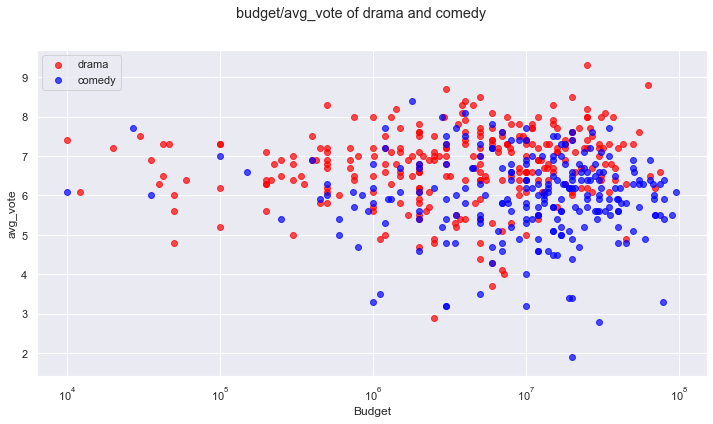

In [14]:
# The two plots here
plot_1 = plt.scatter(drama_budget['budget'], drama_budget['avg_vote'], label = 'drama', alpha = 0.7, color = "red")

plot_2 = plt.scatter(comedy_budget['budget'], comedy_budget['avg_vote'], label = 'comedy', alpha = 0.7, color = "blue")



plt.legend()


plt.xlabel('Budget')
plt.ylabel('avg_vote')
plt.suptitle('budget/avg_vote of drama and comedy')
plt.xscale('log')
plt.gcf().set_size_inches((12, 6))
plt.show()

## Part 7: How has budget, movie voting changed over the years? (16 + 2 points)
Make a figure (potentially multiple subplots) which answer the following questions:
- How has the **average** movie budget changed year to year?
- How has the **average** movie score (`avg_vote`) changed year to year?

Choose a suitable graph type and format so that the graph can be easily understood by a wide audience.

Using your graph, answer the following questions:
1. (roughly) How many times more expensive is an average movie made in 2019 compared to an average movie from 1980?
1. Average scores appear to fall over time. One explanation is that nowadays average movies are simply worse than they used to be. Think of at least two other distinct reasons why this may be the case (reasons must be plausible though no justification is needed).

**BONUS**: Use `plt.fill_between()` to show where the middle-most 50% of the data lies in your plot (hint: pass `alpha` to this function so it doesn't occlude other graph elements).

## Answers of these questions:
1. About like 5 times is the average movies made 
2. There might becuase of the budgets are investing on the commercial film instead of the real quality of the movie.
Also, with the times changing, people's tastes becomes picky.

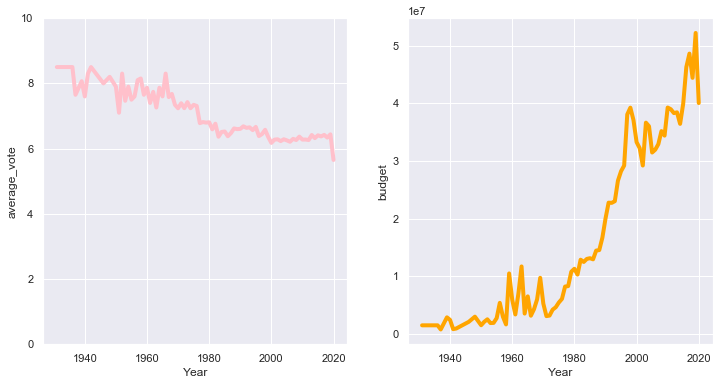

In [15]:
a = tableMoive.groupby('year')[['budget']].mean()

b = tableMoive.groupby('year')[['avg_vote']].mean()


plt.subplot(122)
plt.plot(a, linewidth=4, color='orange', label = 'budget average')
plt.xlabel("Year")
plt.ylabel("budget")

plt.subplot(121)
plt.plot(b, linewidth=4, color='pink', label = " average movie score")
plt.xlabel("Year")
plt.ylabel("average_vote")

# set the ylim to be the same.
plt.ylim(0,10)
plt.gcf().set_size_inches((12,6))